In [5]:
import pygmt 
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Helvetica'
%config InlineBackend.figure_format='retina'
plt.rcParams['text.usetex'] = True #tex rendering
plt.rcParams.update({'font.size': 18})

In [6]:
file="/home/francesco/dati/gmt-6.5.0/ionian/eqs_used.csv"
stations = pd.read_csv("stazioni.txt", sep='\s+', names=["Name", "Net", "Lat", "Lon", "Elev", "Extra"])
eq_data = pd.read_csv(file,sep=";")
df = pd.read_csv("eqs_used.csv", sep=";")
df.columns = df.columns.str.strip()  
# moment components in 10^{exponent} dyne/cm
fm_collection = {"latitude": df["Latitude"].astype(float).tolist(),"longitude": df["Longitude"].astype(float).tolist(),
    "depth": df["Depth"].astype(float).tolist(),"mrr": df["mrr"].astype(float).tolist(),"mtt": df["mtt"].astype(float).tolist(),
    "mff": df["mff"].astype(float).tolist(),"mrt": df["mrt"].astype(float).tolist(),"mrf": df["mrf"].astype(float).tolist(),  
    "mtf": df["mtf"].astype(float).tolist(),"exponent": df["exponent"].astype(int).tolist(),"event_name": df["Event_name"].astype(str).tolist(),
    "plot_longitude": df["Plot_long"].astype(float).tolist(),"plot_latitude": df["Plot_lat"].astype(float).tolist()}

## focal mechanisms

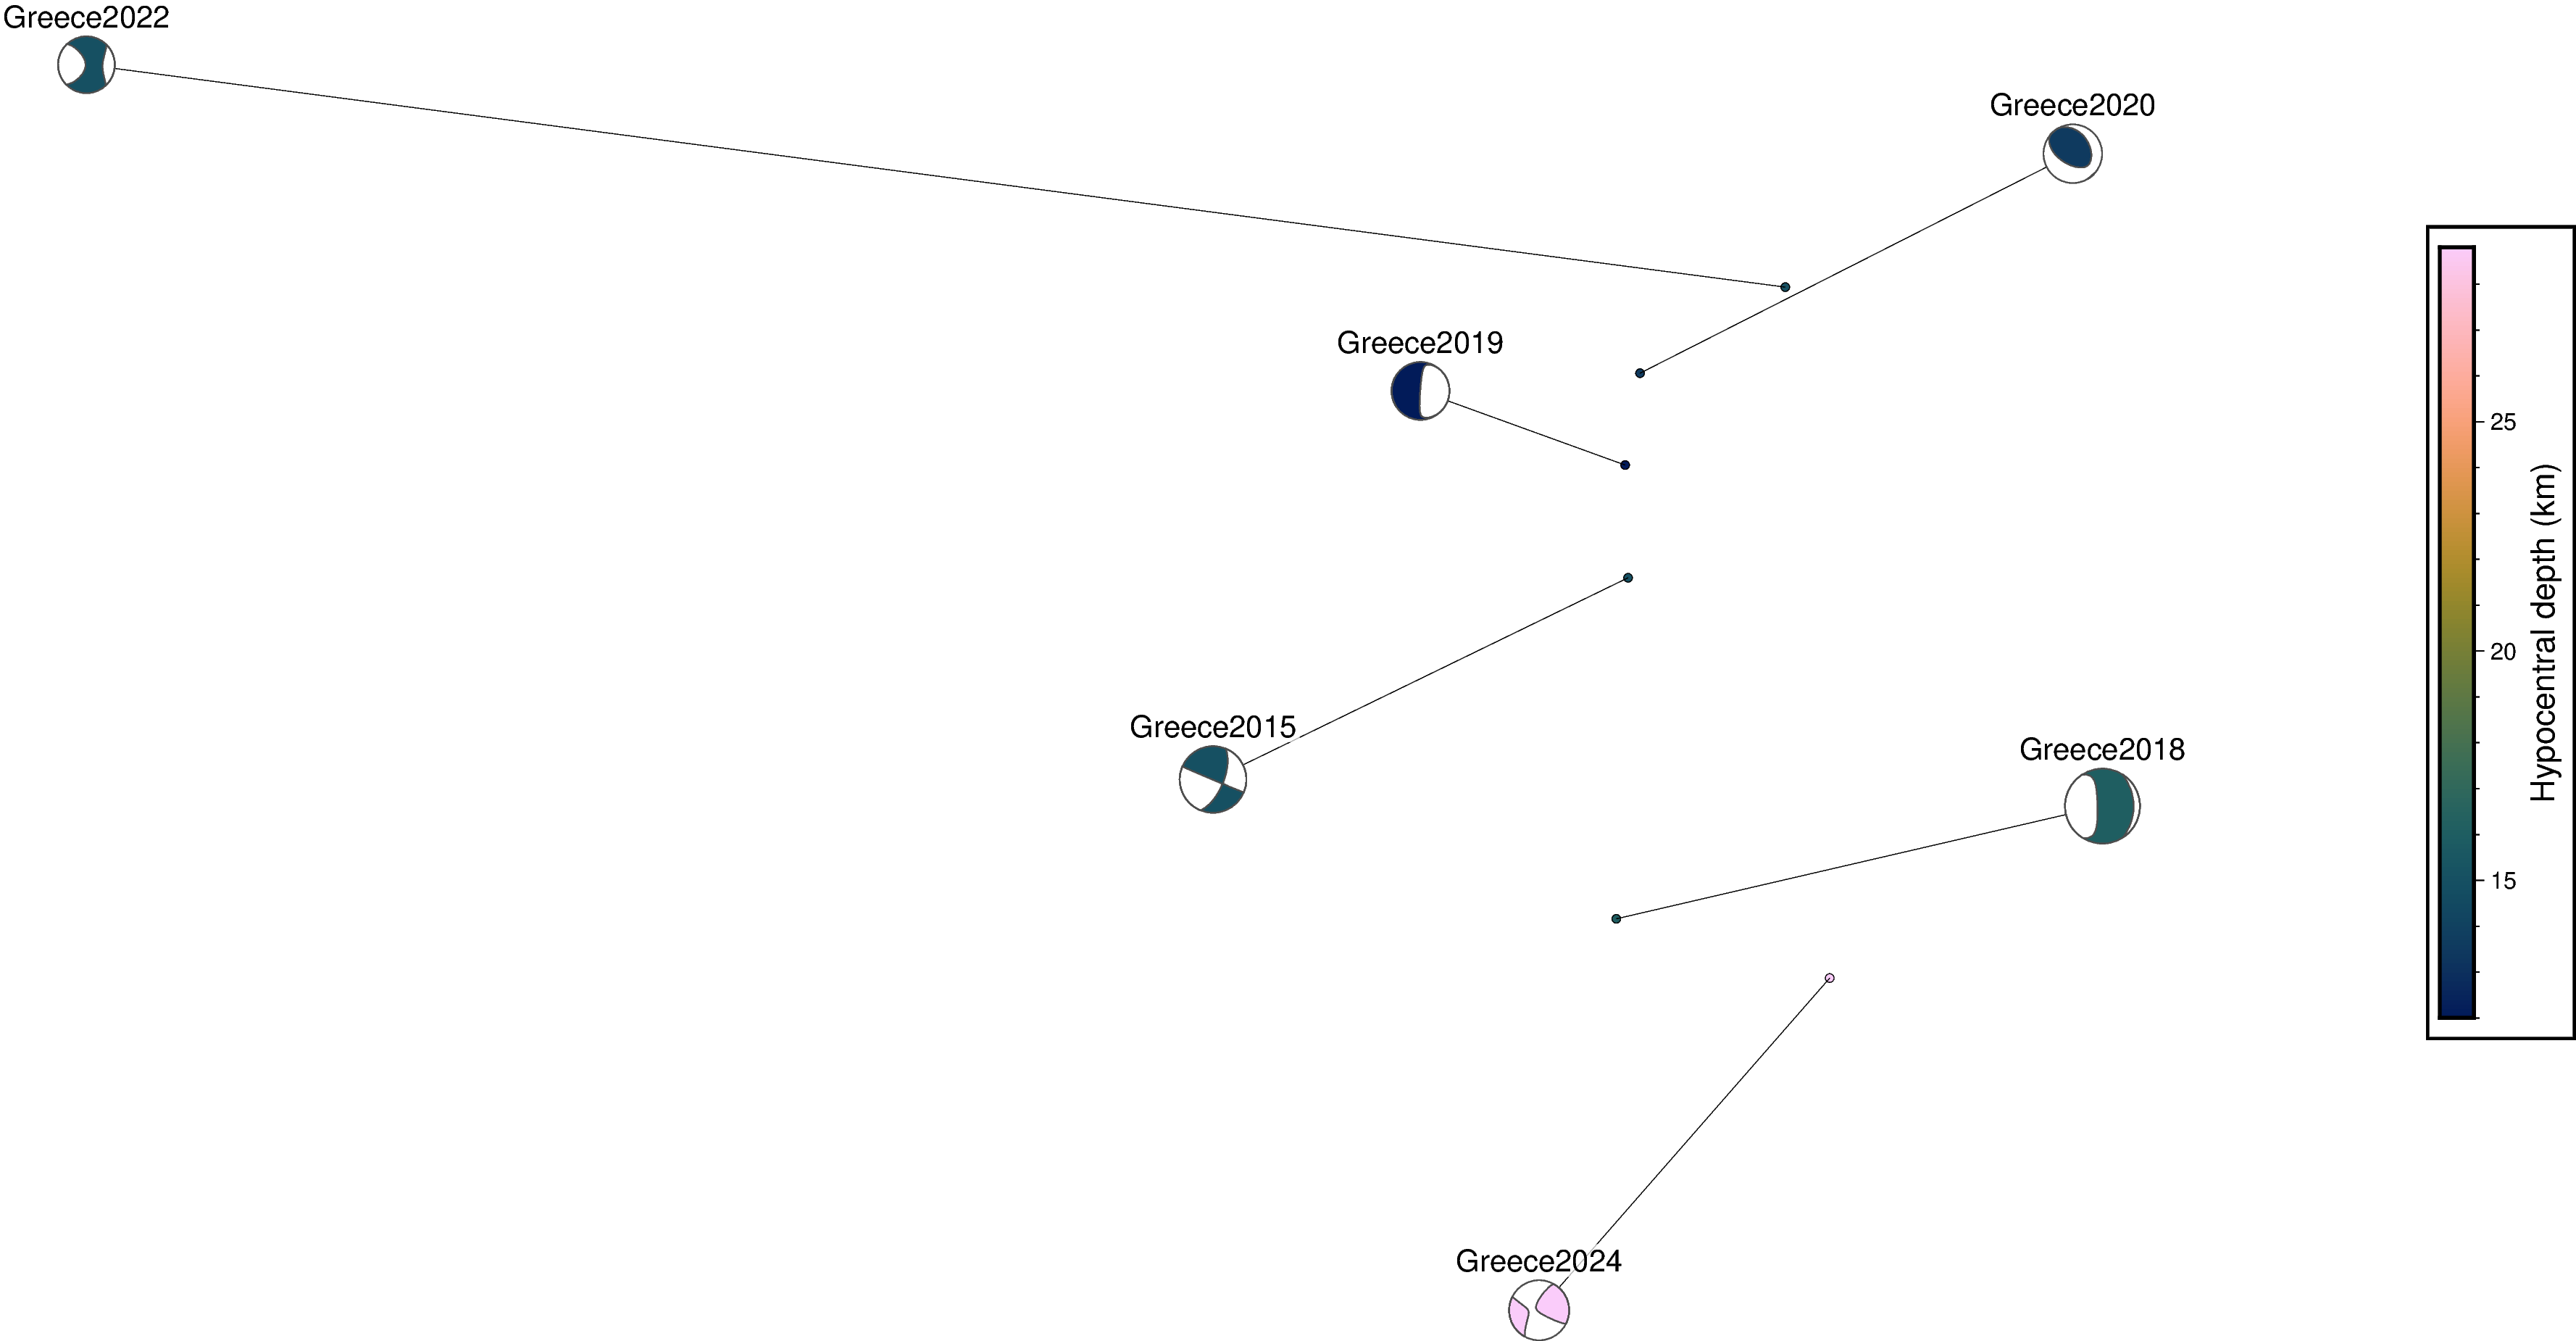

In [3]:
df = pd.read_csv("eqs_used.csv", sep=";")
df.columns = df.columns.str.strip()  # Remove whitespace
# moment components in 10^{exponent} dyne/cm
fm_collection = {
    "latitude": df["Latitude"].astype(float).tolist(),
    "longitude": df["Longitude"].astype(float).tolist(),
    "depth": df["Depth"].astype(float).tolist(),
    "mrr": df["mrr"].astype(float).tolist(),
    "mtt": df["mtt"].astype(float).tolist(),
    "mff": df["mff"].astype(float).tolist(),  # 'mff' renamed
    "mrt": df["mrt"].astype(float).tolist(),
    "mrf": df["mrf"].astype(float).tolist(),  # 'mrf' renamed
    "mtf": df["mtf"].astype(float).tolist(),  # 'mtf' renamed
    "exponent": df["exponent"].astype(int).tolist(),
    "event_name": df["Event_name"].astype(str).tolist(),
    "plot_longitude": df["Plot_long"].astype(float).tolist(),
    "plot_latitude": df["Plot_lat"].astype(float).tolist()
}
lon_min, lon_max = df["Longitude"].min() - 1.0, df["Longitude"].max() + 2.0
lat_min, lat_max = df["Latitude"].min() - 1.0, df["Latitude"].max() + 1.0
region = [lon_min, lon_max, lat_min, lat_max]
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.012")
#fig.basemap(region=region, projection="M14c", frame=["af", "+tEvents used+sICLARC3D"])
#fig.grdimage(grid=grid, shading=True, cmap="geo")
pygmt.makecpt(cmap="batlow", series=[df["Depth"].min(), df["Depth"].max(), 0.1], output="dep.cpt")
with pygmt.config(FONT="19p",FONT_LABEL="16p,Helvetica,black"):
    fig.meca(spec=fm_collection,scale="0.4c+f10p", cmap="dep.cpt",pen="0.8p,black,solid",compressionfill="lightorange", offset="0.2p,black+s0.1c",
        outline="0.4p,gray30",labelbox="white@30",no_clip=True)
    #fig.text(x=df["Longitude"],y=df["Latitude"],text=df["Date"].astype(str), font="1.0+f8.9p,Helvetica-Bold,red", offset="+0.5c/-0.15c",
       # justify="CB")
    fig.plot(x=stations["Lon"], y=stations["Lat"], style="t0.23c", fill="gold",pen="thin",label="Seismic Stations")
#fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="3.2p,Helvetica,black",offset="0.1c/0.1c",justify="LM")
fig.colorbar(cmap="dep.cpt",position="JMR+w9c/0.4c+o0.2c/0c+v",frame="xaf+lHypocentral depth (km)",box="+gwhite+p1p")
#fig.colorbar(cmap="geo",position="JBR+w7.1c/0.5c+o-7.8c/-1.4c+h",frame="xaf+lElevation (m)",box="+gwhite+p1p")
#fig.coast(land=True)
fig.show()
fig.savefig("meca-ioni.png", dpi=190, transparent=True)

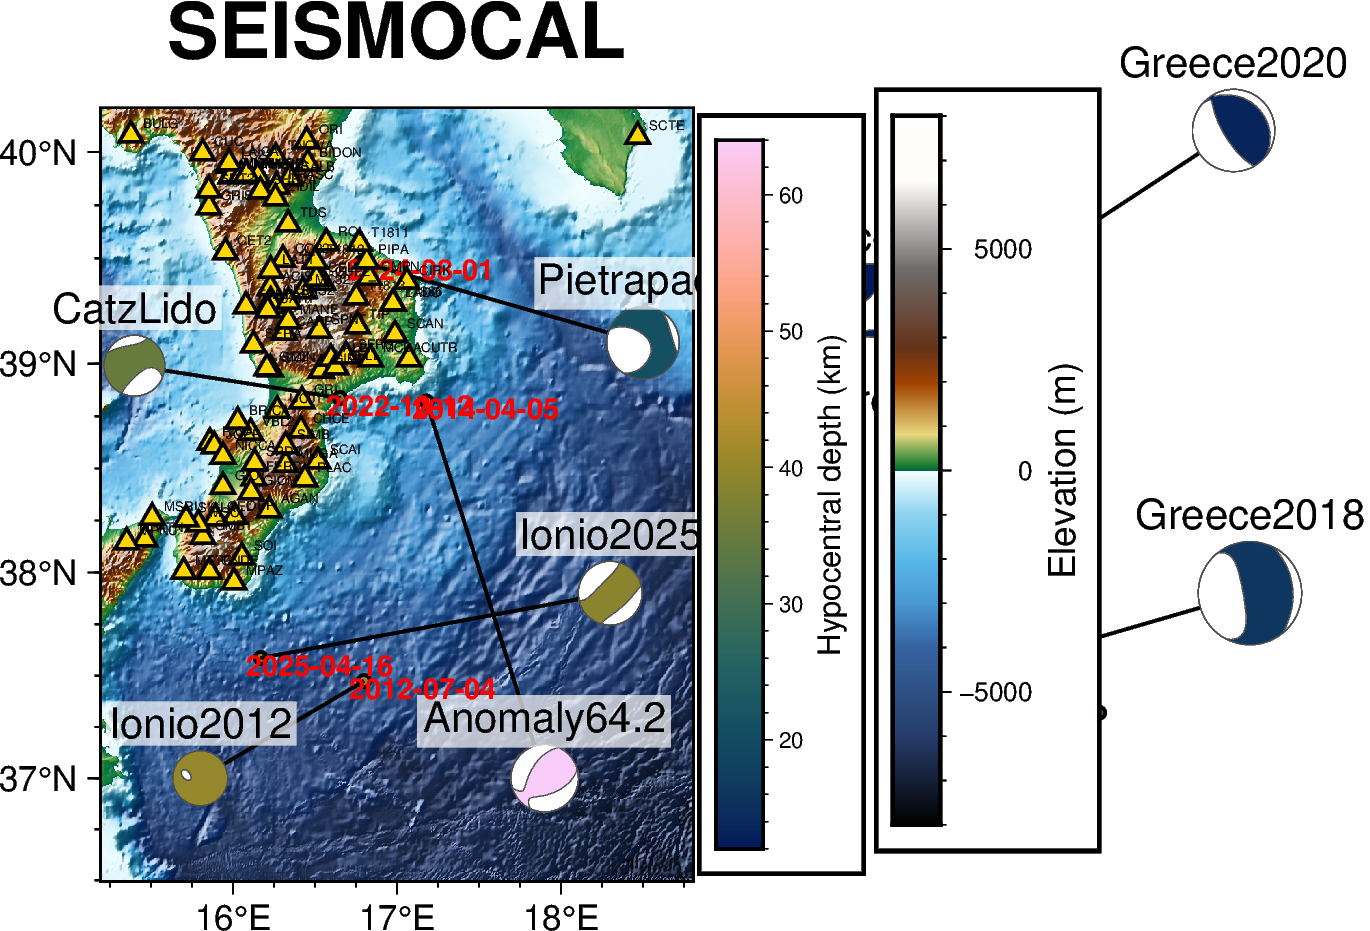

In [7]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.012")
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[15.2,18.8,36.5,40.2])
fig.basemap(region=[15.2,18.8,36.5,40.2], projection="M5c", frame=["af", "+tSEISMOCAL"])
fig.grdimage(grid=grid, shading=True, cmap="geo")
pygmt.makecpt(cmap="batlow", series=[df["Depth"].min(), df["Depth"].max(), 0.1], output="dep.cpt")
fig.meca(spec=fm_collection,scale="0.6c+f10p", cmap="dep.cpt",pen="0.8p,black,solid",compressionfill="lightorange", offset="+s0.1c",
    outline="0.2p,gray30",labelbox="white@30",no_clip=True)
fig.text(x=df["Longitude"],y=df["Latitude"],text=df["Date"].astype(str), font="1.0+f6.9p,Helvetica-Bold,red", offset="+0.5c/-0.15c",
    justify="CB")
fig.plot(x=stations["Lon"], y=stations["Lat"], style="t0.23c", fill="gold",pen="thin",label="Seismic Stations")
fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="3.2p,Helvetica,black",offset="0.1c/0.1c",justify="LM")
fig.colorbar(cmap="dep.cpt",position="JMR+w6c/0.4c+o0.2c/0c+v",frame="xaf+lHypocentral depth (km)",box="+gwhite+p1p")
fig.colorbar(cmap="geo",position="JBR+w6c/0.4c+o1.7c/-6.47c+v",frame="xaf+lElevation (m)",box="+gwhite+p1p")
fig.coast(land=True)
fig.show()
fig.savefig("meca-cal.png", dpi=190)

In [ ]:
df = pd.read_csv("eqs-copia.csv", sep=";")#sola grecia
df.columns = df.columns.str.strip()  # Remove whitespace
# moment components in 10^{exponent} dyne/cm
fm_collection = {
    "latitude": df["Latitude"].astype(float).tolist(),
    "longitude": df["Longitude"].astype(float).tolist(),
    "depth": df["Depth"].astype(float).tolist(),
    "mrr": df["mrr"].astype(float).tolist(),
    "mtt": df["mtt"].astype(float).tolist(),
    "mff": df["mff"].astype(float).tolist(),  
    "mrt": df["mrt"].astype(float).tolist(),
    "mrf": df["mrf"].astype(float).tolist(), 
    "mtf": df["mtf"].astype(float).tolist(),  
    "exponent": df["exponent"].astype(int).tolist(),
    "event_name": df["Event_name"].astype(str).tolist(),
    "plot_longitude": df["Plot_long"].astype(float).tolist(),
    "plot_latitude": df["Plot_lat"].astype(float).tolist()
}
lon_min, lon_max = df["Longitude"].min() - 1.0, df["Longitude"].max() + 2.0
lat_min, lat_max = df["Latitude"].min() - 1.0, df["Latitude"].max() + 1.0
region = [lon_min, lon_max, lat_min, lat_max]
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.012")
fig.basemap(region=region, projection="M14c", frame=["af", "+tEvents used+sICLERC3D"])
fig.grdimage(grid=grid, shading=True, cmap="geo")
pygmt.makecpt(cmap="batlow", series=[df["Depth"].min(), df["Depth"].max(), 0.1], output="dep.cpt")
with pygmt.config(FONT="19p",FONT_LABEL="16p,Helvetica,black"):
    fig.meca(spec=fm_collection,scale="0.9c+f10p", cmap="dep.cpt",pen="0.8p,black,solid",compressionfill="lightorange", offset="0.2p,black+s0.1c",
        outline="0.4p,gray30",labelbox="white@30",no_clip=True)
    fig.text(x=df["Longitude"],y=df["Latitude"],text=df["Date"].astype(str), font="1.0+f15.2p,Helvetica-Bold,red", offset="+0.5c/-0.15c",
        justify="CB")
    fig.plot(x=stations["Lon"], y=stations["Lat"], style="t0.23c", fill="gold",pen="thin",label="Seismic Stations")
#fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="3.2p,Helvetica,black",offset="0.1c/0.1c",justify="LM")
fig.colorbar(cmap="dep.cpt",position="JMR+w19c/0.4c+o0.2c/0c+v",frame="xaf+lHypocentral depth (km)",box="+gwhite+p1p")
fig.colorbar(cmap="geo",position="JBR+w7.1c/0.5c+o-7.8c/-1.4c+h",frame="xaf+lElevation (m)",box="+gwhite+p1p")
fig.coast(land=True)
fig.show()
fig.savefig("meca-elle.png", dpi=190)

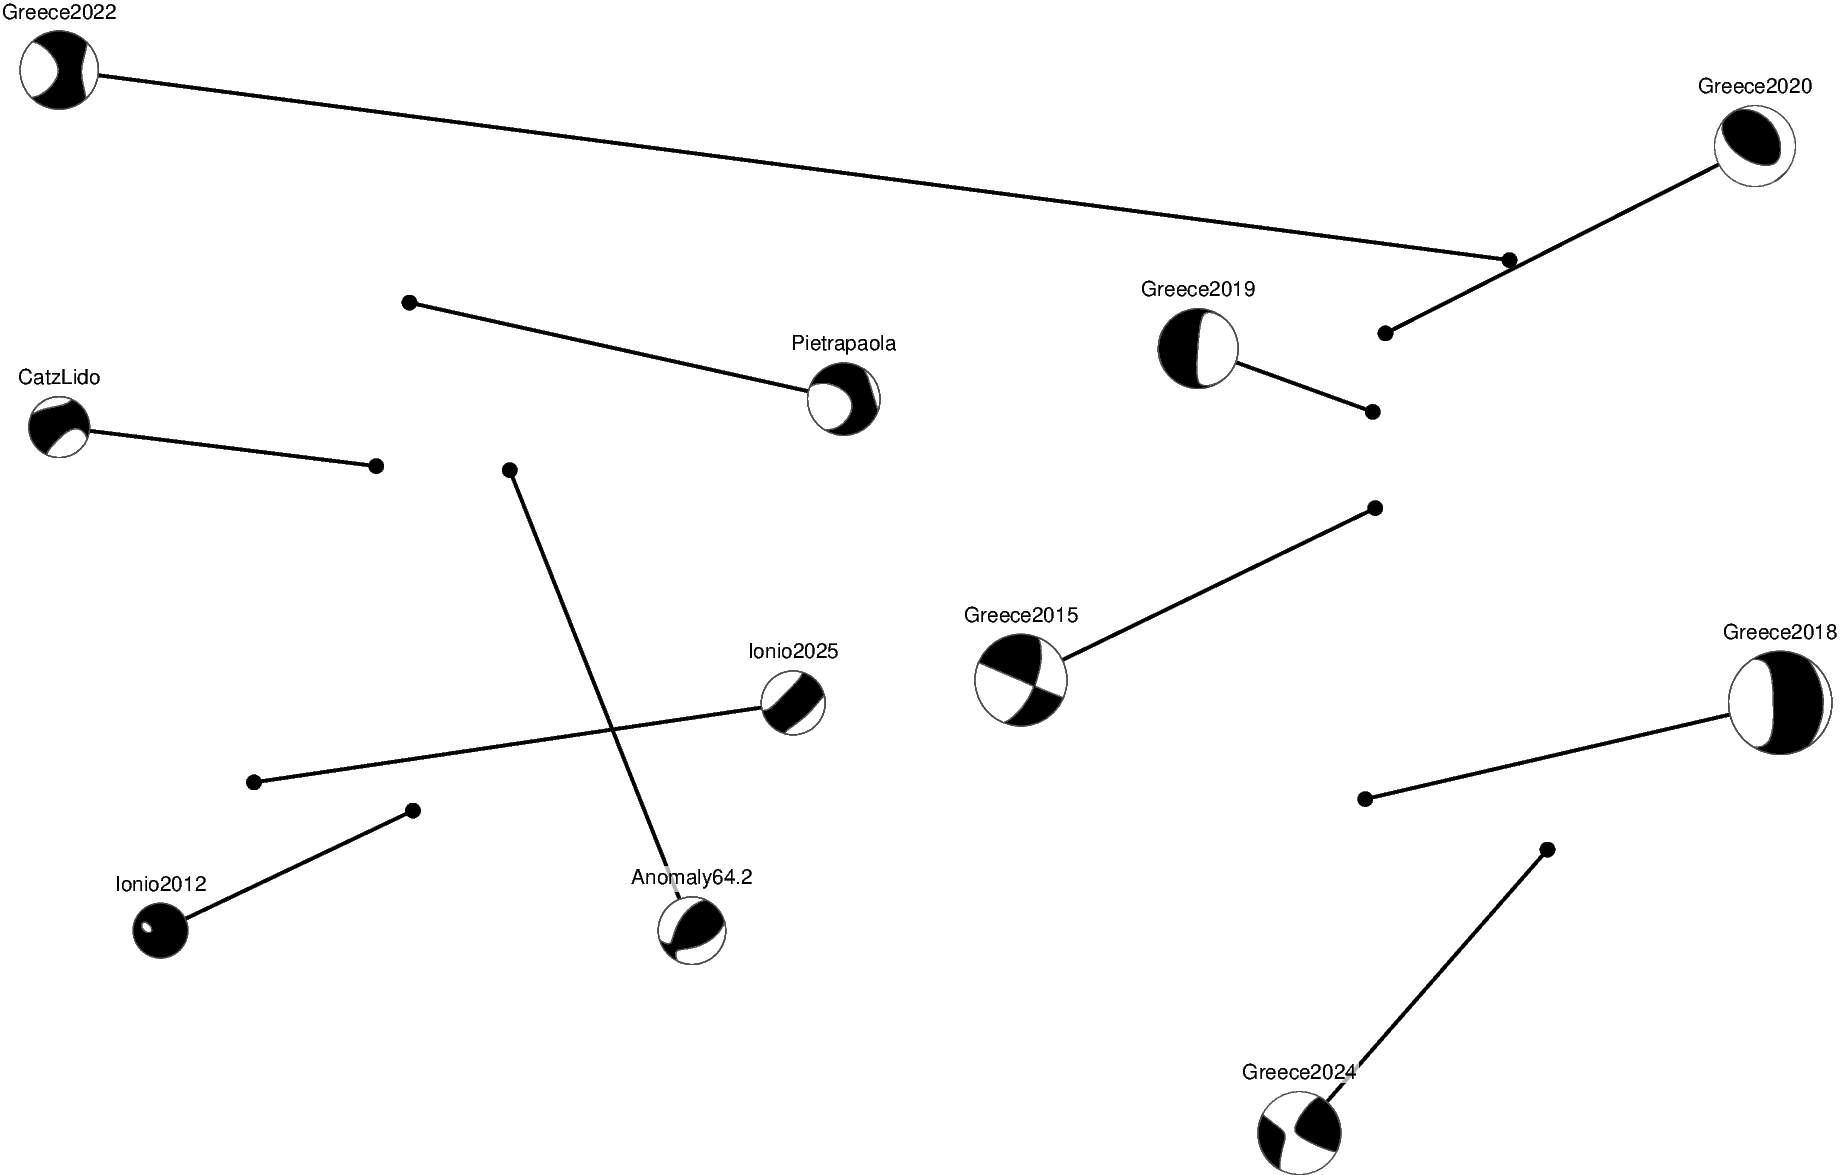

In [11]:
import pygmt as pygmt
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.002")
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[15.0,22.0,36.3,40.01])
#fig.basemap(region=[15.0,22.0,36.3,40.01], projection="M15c", frame=["a","x1f0.1","y1f0.1", "+tSEISMOCAL"])
#fig.grdimage(grid=grid, shading=True, cmap="geo")
pygmt.makecpt(cmap="batlow", series=[df["Depth"].min(), df["Depth"].max(), 0.1], output="dep.cpt")
fig.meca(spec=fm_collection,scale="0.6c+f5p", pen="0.8p,black,solid",compressionfill="black", offset="+s0.1c",
    outline="0.2p,gray30",labelbox="white@30",no_clip=True)

#cmap="dep.cpt"
#fig.text(x=df["Longitude"],y=df["Latitude"],text=df["Date"].astype(str), font="1.0+f6.2p,Helvetica-Bold,red", offset="+0.5c/-0.15c",
   # justify="CB")
#fig.plot(x=stations["Lon"], y=stations["Lat"], style="t0.23c", fill="gold",pen="thin",label="Seismic Stations")
#fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="3.2p,Helvetica,black",offset="0.1c/0.1c",justify="LM")
#fig.colorbar(cmap="dep.cpt",position="JMR+w9.5c/0.7c+o0.2c/0c+v",frame=["xaf+lhypocentral depth (km)"],box="+gwhite+p1p")
#fig.colorbar(cmap="geo",position="JBR+w6c/0.4c+o-6.55c/-1.6c+h",frame="xaf+lElevation (m)",box="+gwhite+p1p")
#fig.coast(land=True)
fig.show()
fig.savefig("bocce.png", dpi=190,transparent=True,crop=True)

## inset

plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.
/tmp/ipykernel_17804/1164681062.py:11: SyntaxWarning: Short-form parameter (D) is not recommended. Use long-form parameter 'position' instead.
  fig.legend(spec='legend.txt', box='+gwhite+p2p', D="jBL+w5c")


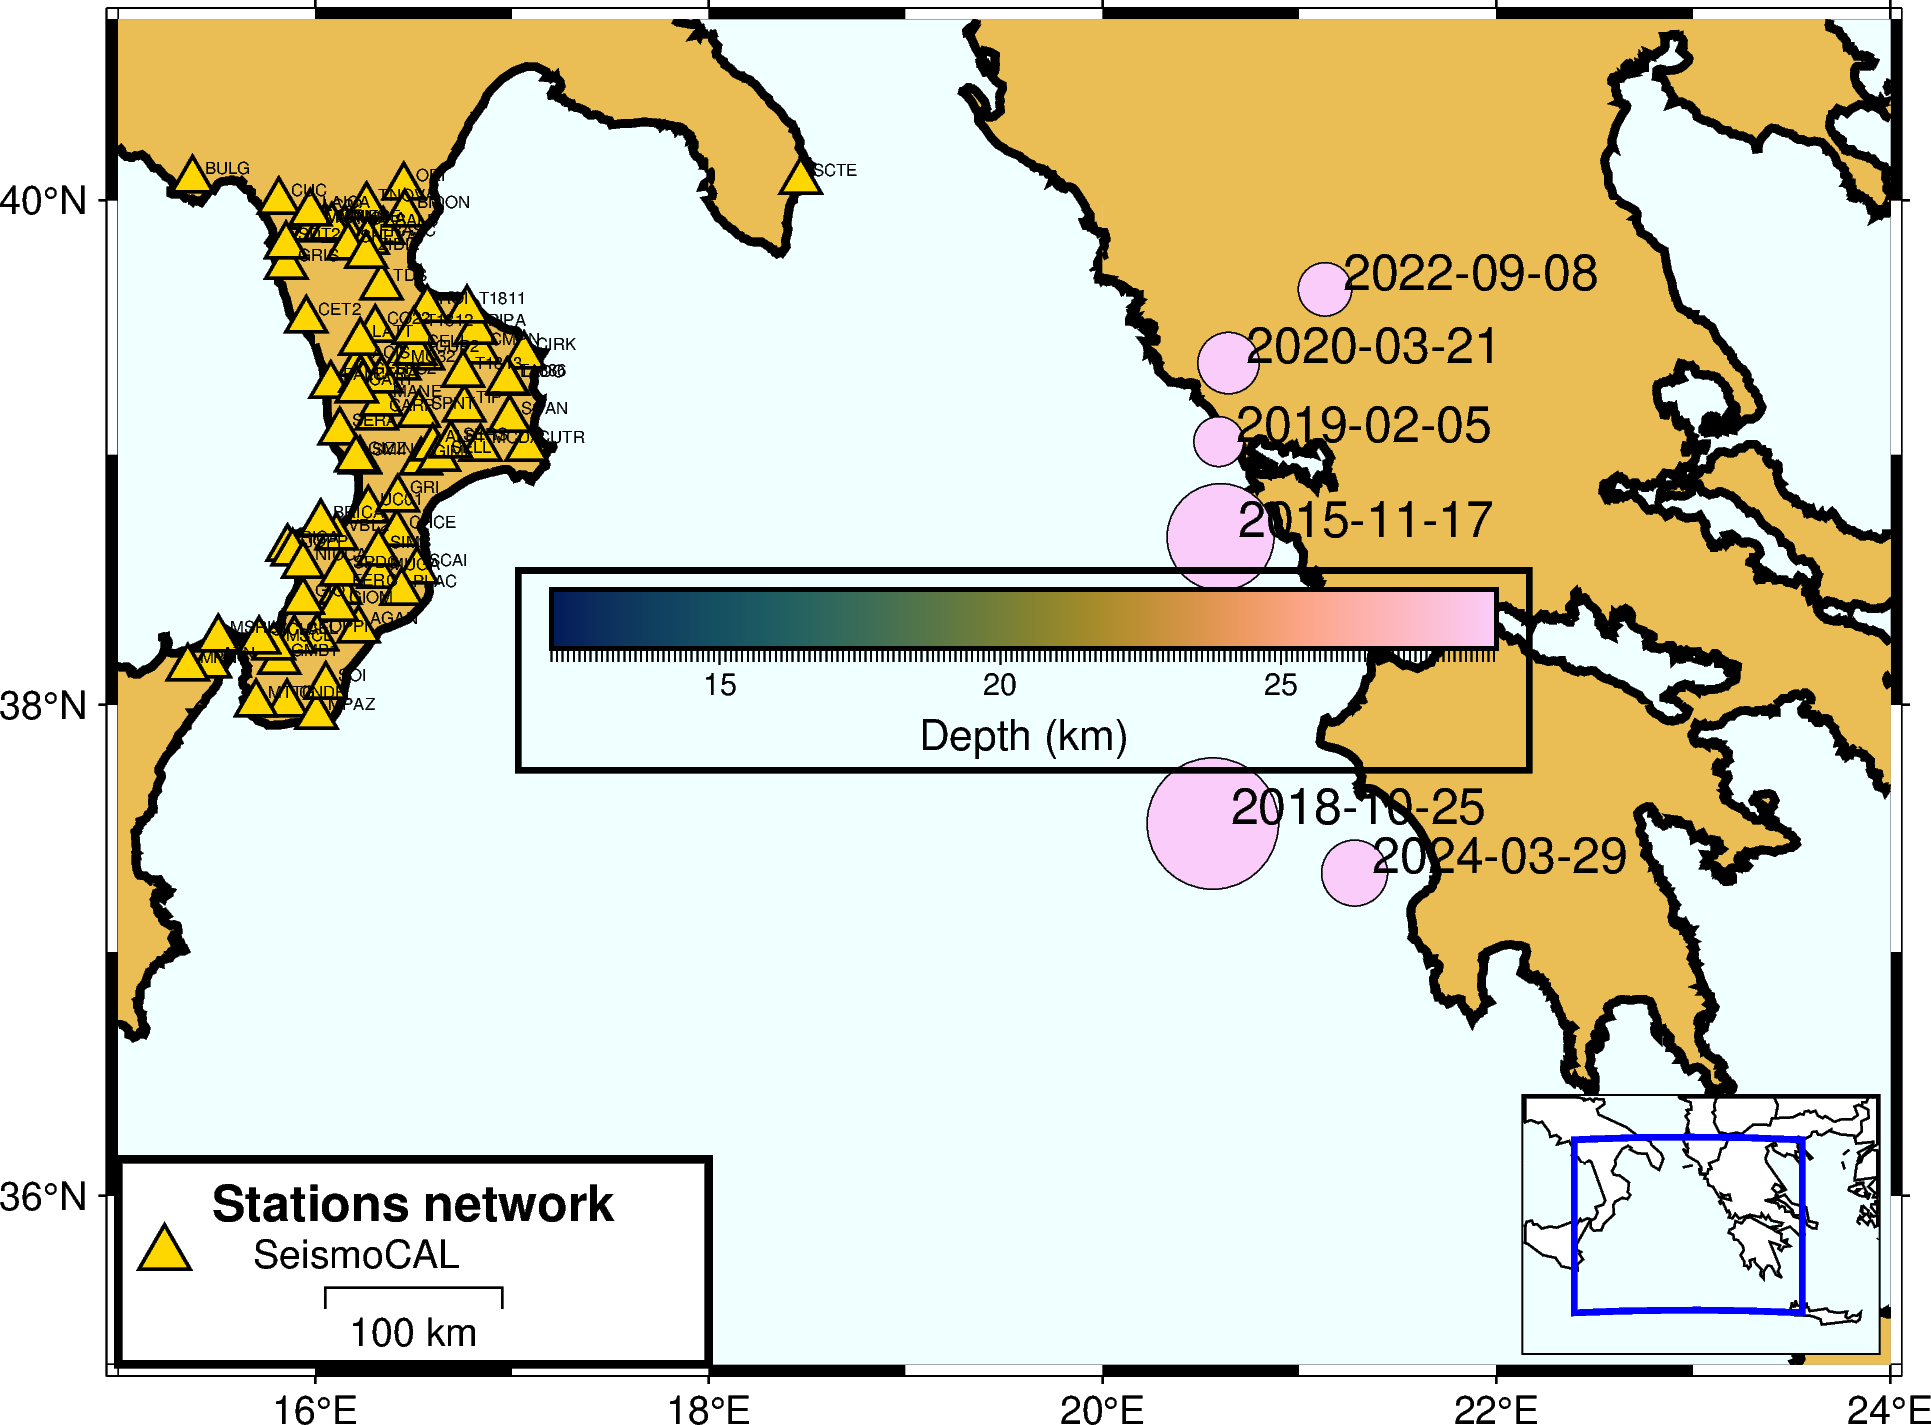

In [9]:
region = [15, 24, 35.3, 40.7]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=["WSne", "af"])
fig.coast(land="lightbrown", water="azure1", shorelines="2p", area_thresh=1000)
fig.plot(x=stations["Lon"],y=stations["Lat"],style="t0.4c",fill="gold",pen="thin",label="Seismic Stations")
fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="4p,Helvetica,black",offset="0.1c/0.1c",justify="LM")
pygmt.makecpt(cmap="batlow", series=[eq_data["Depth"].min(), eq_data["Depth"].max()])
fig.plot(x=eq_data["Longitude"],y=eq_data["Latitude"],size=0.01 * 2**eq_data["Magnitude"],style="cc",fill=eq_data["Depth"],cmap="batlow",pen="black",label="Earthquakes")
fig.colorbar(position="g17.2/38.225+w8c/0.5c+h",frame=["xaf0.1+lDepth (km)"], box=True)
fig.text(x=eq_data["Longitude"],y=eq_data["Latitude"],text=eq_data["Date"],font="12p,Helvetica,black",offset="0.15c/0.15c",justify="LM")
fig.legend(spec='legend.txt', box='+gwhite+p2p', D="jBL+w5c")
with fig.inset(position="jBR+o0.1c",box="+gwhite+p1p",region=[13, 27, 34, 42],projection="M3c",):
    fig.coast(dcw="JP+glightbrown+p0.2p",water="azure1",shorelines="0.5p",borders=[1],area_thresh=1000,)
    rectangle = [[region[0], region[2], region[1], region[3]]]#
    fig.plot(data=rectangle, style="r+s", pen="1.5p,blue")
fig.show()
fig.savefig('inset.png')

plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.
/tmp/ipykernel_13191/3902474878.py:12: SyntaxWarning: Short-form parameter (D) is not recommended. Use long-form parameter 'position' instead.
  fig.legend(spec='legend.txt', box='+gwhite+p2p', D="jBL+w5c")


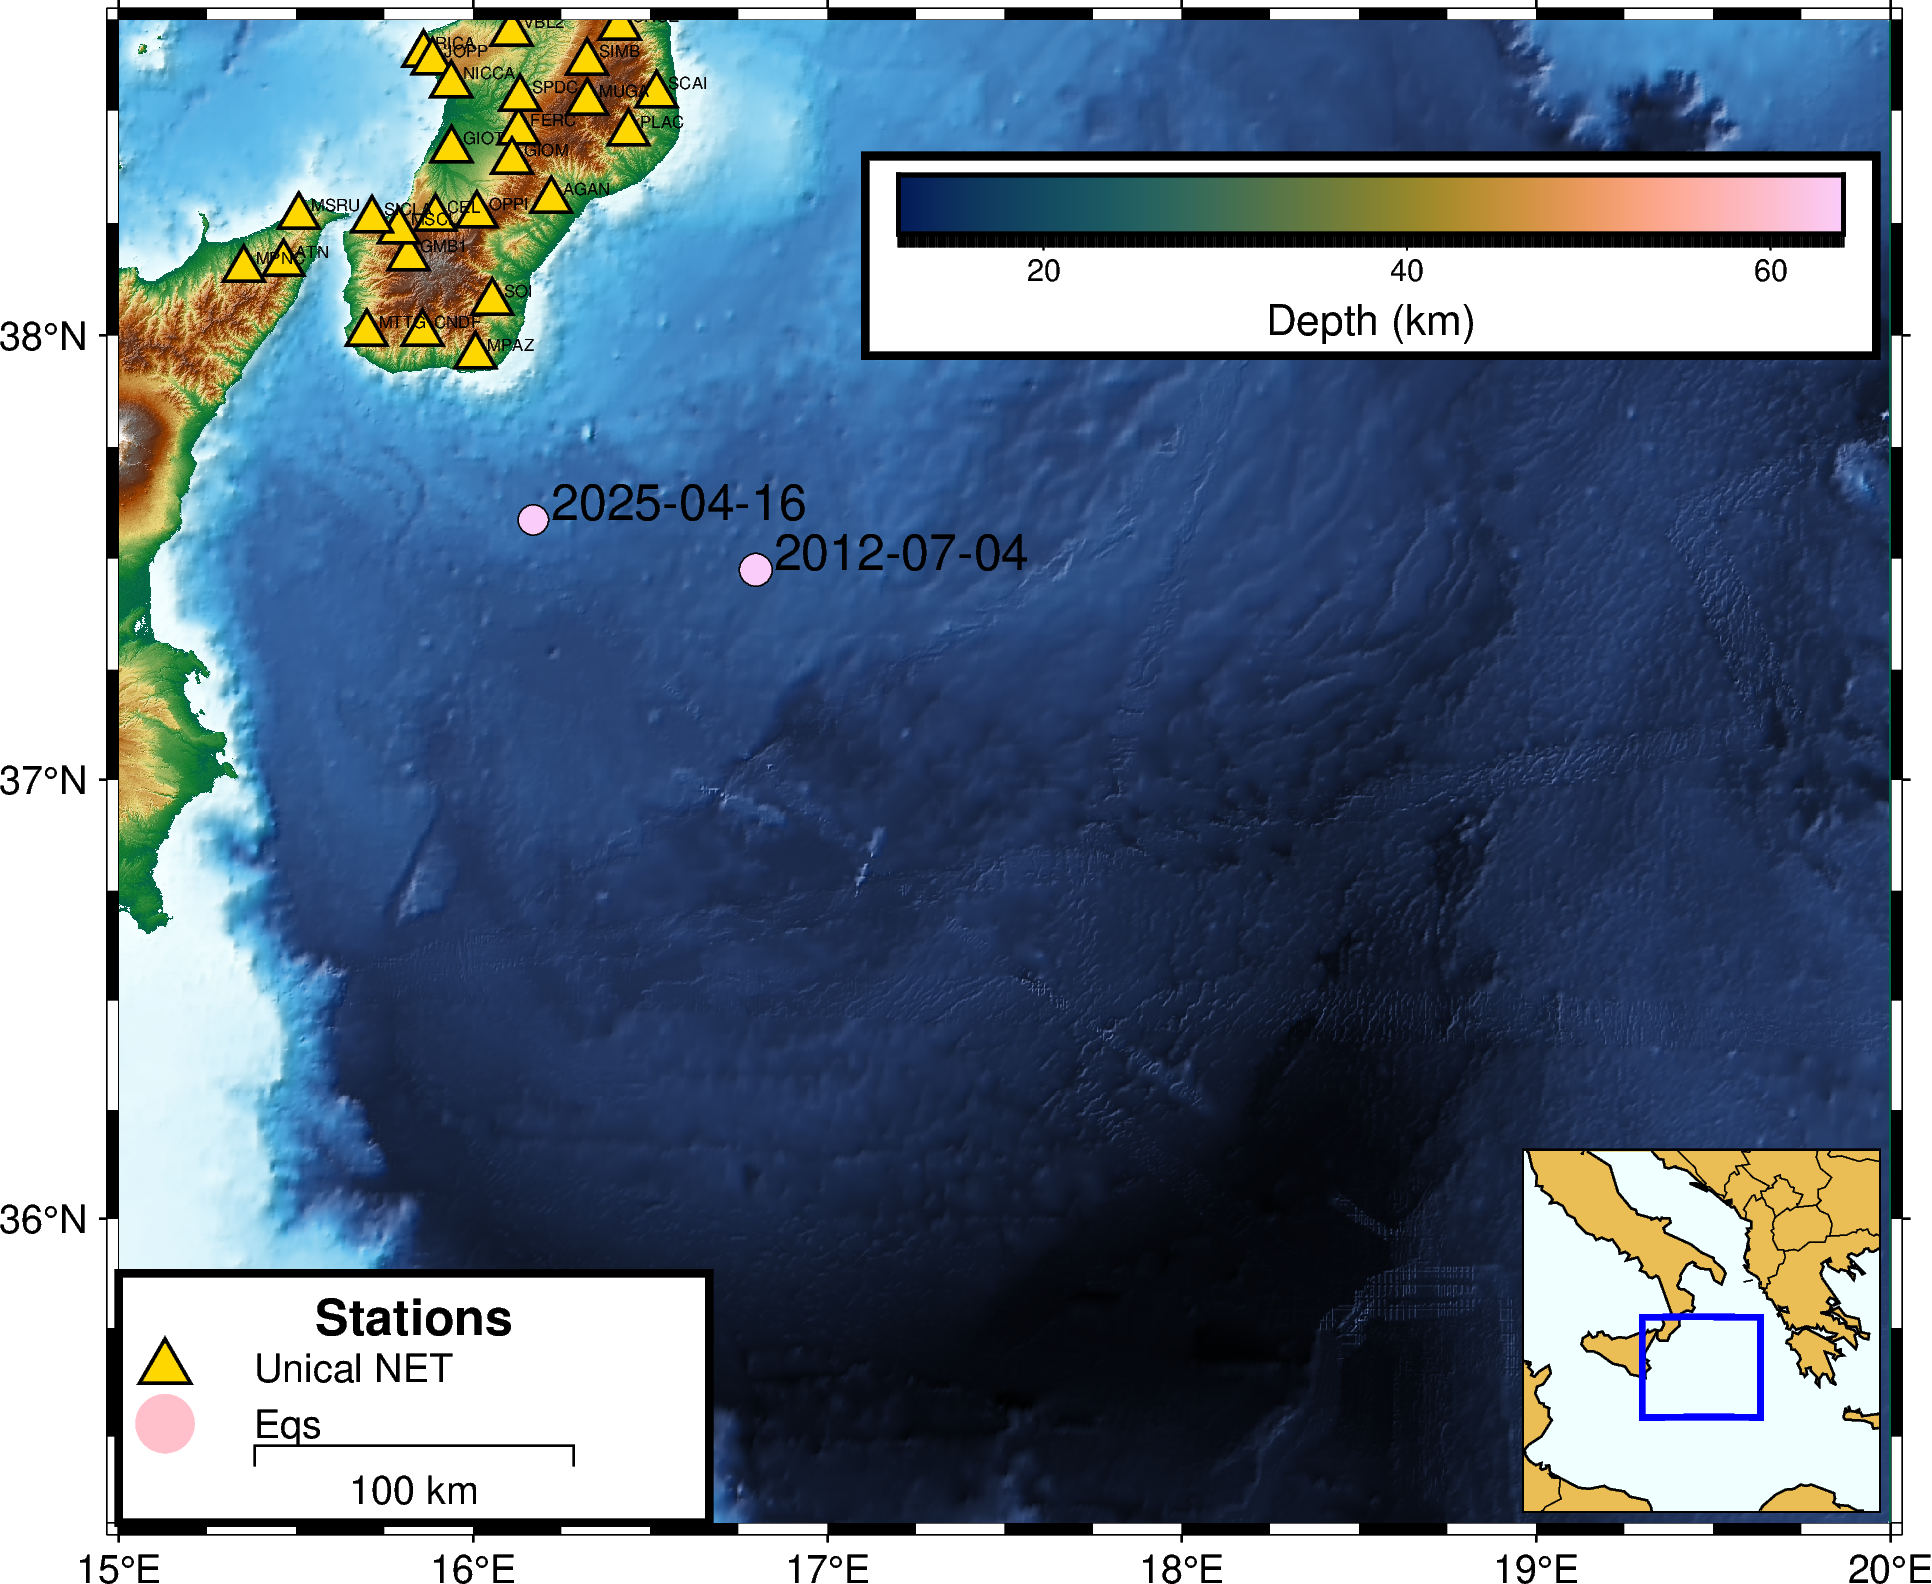

In [66]:
region = [15, 20, 35.3, 38.7]
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="01s", region=region)
fig.basemap(region=region, projection="M15c", frame=["WSne", "af"])
fig.grdimage(grid=grid, cmap="geo", shading=True)
fig.plot(x=stations["Lon"],y=stations["Lat"],style="t0.4c",fill="gold",pen="thin",label="Seismic Stations")
fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="4p,Helvetica,black",offset="0.1c/0.1c",justify="LM")
pygmt.makecpt(cmap="batlow", series=[eq_data["Depth"].min(), eq_data["Depth"].max()])
fig.plot(x=eq_data["Longitude"],y=eq_data["Latitude"],size=0.01 * 2**eq_data["Magnitude"],style="cc",fill=eq_data["Depth"],cmap="batlow",pen="black",label="Earthquakes")
fig.colorbar(position="g17.2/38.225+w8c/0.5c+h", frame=["xaf0.1+lDepth (km)"], box="+gwhite+p2p")
fig.text(x=eq_data["Longitude"],y=eq_data["Latitude"],text=eq_data["Date"],font="12p,Helvetica,black",offset="0.15c/0.15c",justify="LM")
fig.legend(spec='legend.txt', box='+gwhite+p2p', D="jBL+w5c")
with fig.inset(position="jBR+o0.1c",box="+gwhite+p1p",region=[10, 25, 32, 44],projection="M3c",):
    fig.coast(land="lightbrown",water="azure1",shorelines="0.5p",borders=[1],area_thresh=1000)
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1.5p,blue")
fig.show()
fig.savefig('inset_t.png')

## 3d view

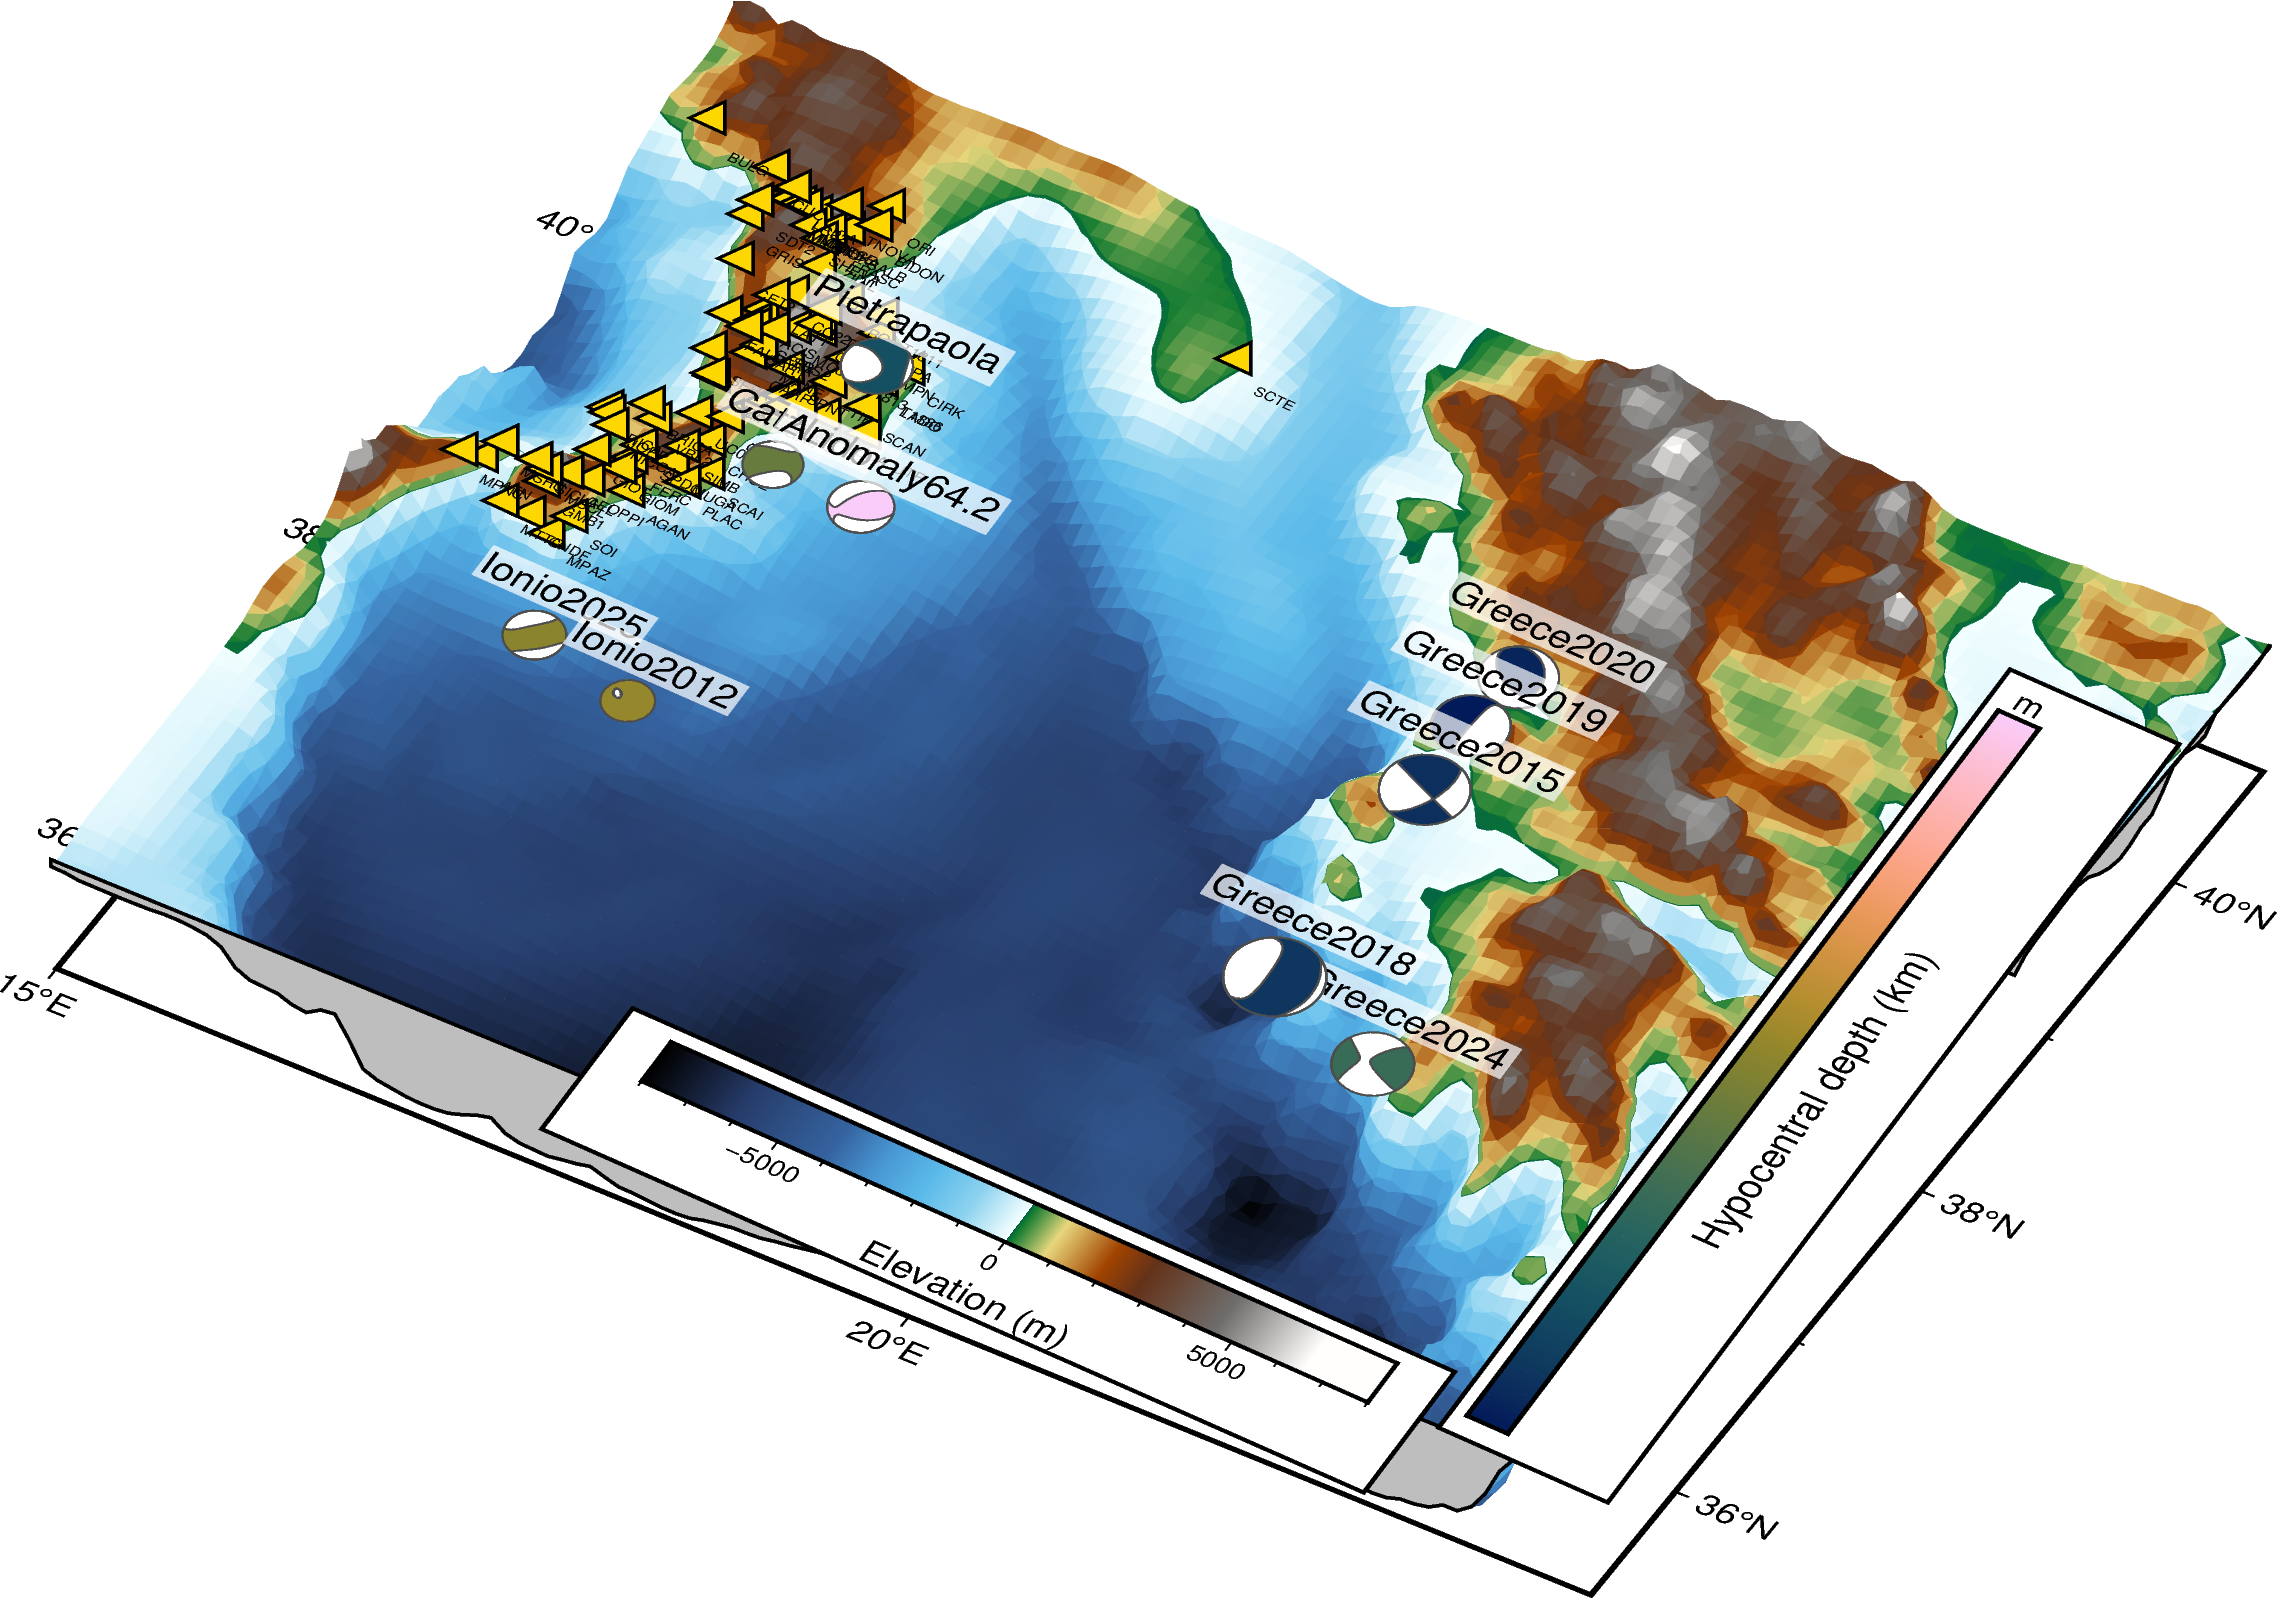

In [70]:
fig = pygmt.Figure()
region = [15, 24, 35.3, 40.7]
grid = pygmt.datasets.load_earth_relief(resolution="05m", region=region)
pygmt.config(MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.012")
fig.grdview(grid=grid,region=[15, 24, 35.3, 40.7],perspective=[150, 45],
    frame=["xa", "yaf", "WSnE"], projection="M15c", zsize="2.0c",
    surftype="s",cmap="geo",
    # Defina a elevação do plano para 0 metros e faça o preenchimento "cinza"
    plane="0+ggray",)
fig.plot(x=stations["Lon"],y=stations["Lat"],style="t0.4c",fill="gold",
    pen="thin",perspective=[150, 52],label="Seismic Stations")
fig.text(x=stations["Lon"],y=stations["Lat"],text=stations["Name"],font="4p,Helvetica,black",
    offset="0.1c/0.1c",perspective=[150, 50],justify="LM")
df = pd.read_csv("eqs_used.csv", sep=";")
df.columns = df.columns.str.strip()  # Remove whitespace
# moment components in 10^{exponent} dyne/cm
fm_collection = {
    "latitude": df["Latitude"].astype(float).tolist(),
    "longitude": df["Longitude"].astype(float).tolist(),
    "depth": df["Depth"].astype(float).tolist(),
    "mrr": df["mrr"].astype(float).tolist(),
    "mtt": df["mtt"].astype(float).tolist(),
    "mff": df["mff"].astype(float).tolist(),  
    "mrt": df["mrt"].astype(float).tolist(),
    "mrf": df["mrf"].astype(float).tolist(),  
    "mtf": df["mtf"].astype(float).tolist(),  # 'mtf' renamed
    "exponent": df["exponent"].astype(int).tolist(),
    "event_name": df["Event_name"].astype(str).tolist(),
    # "plot_longitude": df["Plot_long"].astype(float).tolist(),
    # "plot_latitude": df["Plot_lat"].astype(float).tolist()
}
pygmt.makecpt(cmap="batlow", series=[df["Depth"].min(), df["Depth"].max(), 0.1], output="dep.cpt")
fig.meca(spec=fm_collection,scale="0.6c+f10p", cmap="dep.cpt",pen="0.8p,black,solid",compressionfill="lightorange", offset="0.2p,black+s0.1c",
    outline="0.4p,gray30",labelbox="white@30",no_clip=True, perspective=[150, 50])
fig.colorbar(cmap="dep.cpt",position="JMR+w9c/0.4c+o-1.9c/0c+v",frame=["a500", "x+lHypocentral depth (km)", "y+lm"],box="+gwhite+p1p",perspective=True)
fig.colorbar(cmap="geo",position="JBR+w7.1c/0.5c+o-9.8c/-1.4c+h",frame="xaf+lElevation (m)",box="+gwhite+p1p",perspective=True)
fig.show()